# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E:\\Python\\AML\\HW 3\\affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=0)

Обучаем модель

In [9]:
model.fit(X_train, 
          Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)
predictions

array([[0.37442489, 0.62557511],
       [0.92523133, 0.07476867],
       [0.68436964, 0.31563036],
       ...,
       [0.54059869, 0.45940131],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [11]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [12]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        test_size=0.3, 
                                                        random_state=i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [13]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [14]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [15]:
precision = tp / (tp + fp)
precision

0.5681233933161953

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [17]:
preds = model.predict(X_test)
accuracy_score(Y_test, preds)

0.7204188481675393

In [18]:
precision_score(Y_test, preds), recall_score(Y_test, preds)

(0.5681233933161953, 0.37649063032367974)

### Используем готовые библиотеки

In [19]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [20]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [21]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.04895298489885702)
(0.3074501573976915, 0.9982964224872232, 0.05209819104923271)
(0.30761154855643047, 0.9982964224872232, 0.05253954554878021)
(0.3077731092436975, 0.9982964224872232, 0.05290951865434032)
(0.30793483972674723, 0.9982964224872232, 0.053728564638523525)
(0.30809674027339645, 0.9982964224872232, 0.05418294149577135)
(0.30825881115202525, 0.9982964224872232, 0.05456382061777478)
(0.30842105263157893, 0.9982964224872232, 0.05474131095360387)
(0.30858346498156924, 0.9982964224872232, 0.05545339783700808)
(0.3087460484720759, 0.9982964224872232, 0.05780133759457949)
(0.30890880337374804, 0.9982964224872232, 0.05932824182550636)
(0.3090717299578059, 0.9982964224872232, 0.05936553929315826)
(0.3092348284960422, 0.9982964224872232, 0.0618223044429855)
(0.3093980992608237, 0.9982964224872232, 0.062105310546399874)
(0.30956154252509244, 0.9982964224872232, 0.06244017268251165)
(0.3091966173361522, 0.9965928449744463, 0.06245992726053596)
(0.309360126916

In [22]:
from sklearn.metrics import average_precision_score

In [23]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [24]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [25]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [26]:
from sklearn.metrics import auc

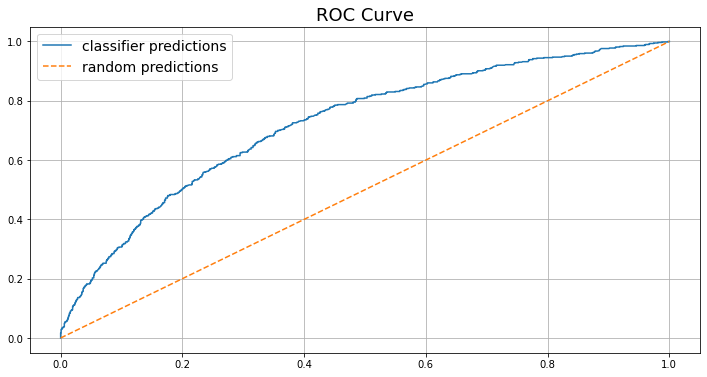

AUC is 0.72


In [27]:
import numpy as np
plt.figure(figsize=(12,6))
plt.title("ROC Curve", fontsize=18)
plt.grid()
plt.plot(fpr, tpr, label='classifier predictions')
plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100), 
         linestyle='--', 
         label='random predictions')
plt.legend(fontsize=14)
plt.show()
print("AUC is %.2f" %auc(fpr, tpr))

**Построим еще одну модель и сравним их между собой**

In [28]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [29]:
model2 = LogisticRegression()

In [30]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split(Xshort, Y, 
                                                                test_size=0.3, 
                                                                random_state=0)

In [31]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [32]:
predictions2 = model2.predict_proba( X_test_short )

In [33]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

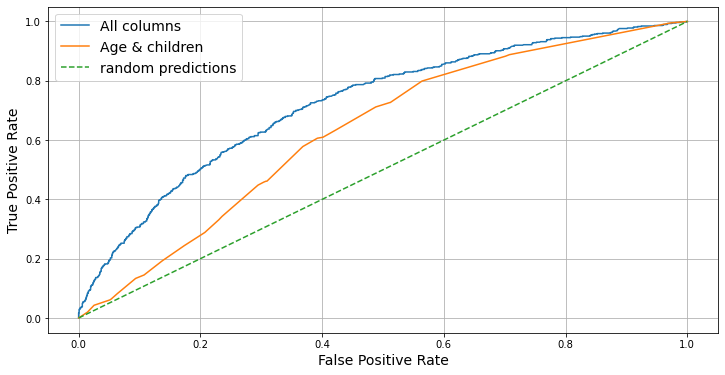

AUC score for all columns is 0.72
AUC score for 2 columns is 0.63


In [34]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100), 
         linestyle='--', 
         label='random predictions')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

plt.legend(fontsize=14 )
plt.show()

print("AUC score for all columns is %.2f"%auc(fpr,tpr))
print("AUC score for 2 columns is %.2f"%auc(fpr2,tpr2))

# Home Work 3 

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [53]:
import numpy as np

fpr3 = []
tpr3 = []
precision3 = []

predictions = model.predict_proba( X_test )

for threshold in np.linspace(1, 0, 100): 
   
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):  
        
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    fpr3.append(fp / (fp + tn))
    tpr3.append(tp / (tp + fn))
    if (tp + fp) != 0:
        precision3.append( tp / (tp + fp) )
    else:
        precision3.append(None)
        
fpr4 = np.asarray(fpr3)
tpr4 = np.asarray(tpr3)
precision4 = np.asarray(precision3)
recall4 = tpr4      


In [54]:
fpr3

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007674597083653108,
 0.0007674597083653108,
 0.0007674597083653108,
 0.0015349194167306216,
 0.0015349194167306216,
 0.0023023791250959325,
 0.003837298541826554,
 0.0061396776669224865,
 0.007674597083653108,
 0.00920951650038373,
 0.009976976208749041,
 0.013814274750575594,
 0.017651573292402148,
 0.01918649270913277,
 0.02072141212586339,
 0.02762854950115119,
 0.031465848042977744,
 0.035303146584804296,
 0.03607060629316961,
 0.0422102839600921,
 0.04528012279355334,
 0.04834996162701458,
 0.051419800460475826,
 0.05755947812739831,
 0.059861857252494245,
 0.0636991557943208,
 0.06830391404451266,
 0.07597851112816577,
 0.07981580966999233,
 0.0851880276285495,
 0.08979278587874137,
 0.09593246354566386,
 0.10360706062931696,
 0.11511895625479662,
 0.12356101304681504,
 0.1273983115886416,
 0.1343054489639294,
 0.13967766692248657,
 0.15042210283960092,
 0.15809669992325404,
 0.16807367613200308,
 0.17881811204911743,
 0.18956254796623176,


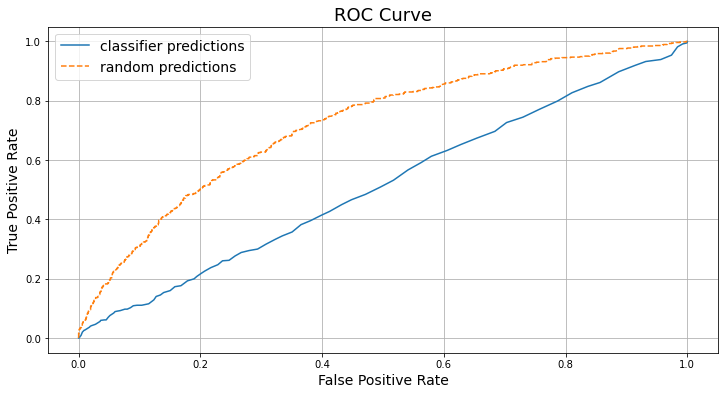

AUC is 0.51


In [56]:
import numpy as np
plt.figure(figsize=(12,6))
plt.title("ROC Curve", fontsize=18)
plt.grid()
plt.plot(fpr3, tpr3, label='classifier predictions')
plt.plot(fpr, tpr,
         linestyle='--', 
         label='random predictions')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=14)
plt.show()
print("AUC is %.2f" %auc(fpr3, tpr3))

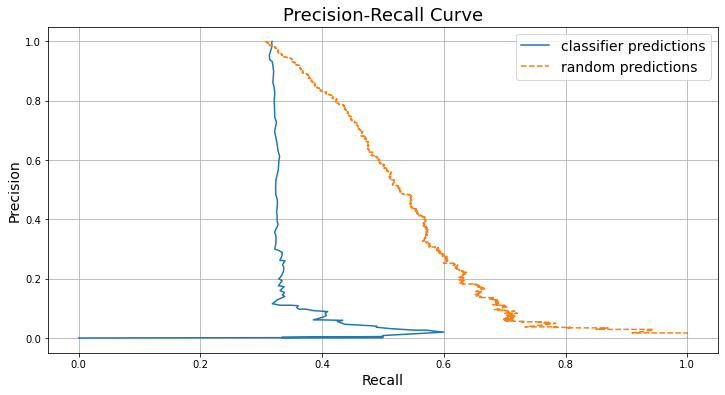

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [57]:

plt.figure(figsize=(12,6))
plt.title("Precision-Recall Curve", fontsize=18)
plt.grid()
plt.plot(precision4, recall4, label='classifier predictions')
plt.plot(pr, re, 
         linestyle='--', 
         label='random predictions')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(fontsize=14)
plt.show()
print("AUC is %.2f" %auc(precision4, recall4))

In [39]:
tpr_manual = []
fpr_manual = []
precision_manual = []
recall_manual = []

Thres = np.linspace(1.0, 0.0, num=100, endpoint=True)
for threshold in Thres:
    tp_m = 0 # True positive_manual
    fp_m = 0 # False positive_manual
    fn_m = 0 # False negative_manual
    tn_m = 0 # True negative_manual
    for predicted_prob, actual in zip(predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp_m += 1
            else:
                fp_m += 1
        else:
            if actual == 1:
                fn_m += 1
            else:
                tn_m += 1
    # метрики
    tpr_manual.append( tp_m / (tp_m + fn_m) )
    fpr_manual.append( fp_m / (fp_m + tn_m) )
    recall_manual.append( tp_m / (tp_m + fn_m) )
    if (tp_m + fp_m) != 0:
        precision_manual.append( tp_m / (tp_m + fp_m) )
    else:
        precision_manual.append(None)

In [40]:
fpr_manual

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007674597083653108,
 0.0007674597083653108,
 0.0007674597083653108,
 0.0015349194167306216,
 0.0015349194167306216,
 0.0023023791250959325,
 0.003837298541826554,
 0.0061396776669224865,
 0.007674597083653108,
 0.00920951650038373,
 0.009976976208749041,
 0.013814274750575594,
 0.017651573292402148,
 0.01918649270913277,
 0.02072141212586339,
 0.02762854950115119,
 0.031465848042977744,
 0.035303146584804296,
 0.03607060629316961,
 0.0422102839600921,
 0.04528012279355334,
 0.04834996162701458,
 0.051419800460475826,
 0.05755947812739831,
 0.059861857252494245,
 0.0636991557943208,
 0.06830391404451266,
 0.07597851112816577,
 0.07981580966999233,
 0.0851880276285495,
 0.08979278587874137,
 0.09593246354566386,
 0.10360706062931696,
 0.11511895625479662,
 0.12356101304681504,
 0.1273983115886416,
 0.1343054489639294,
 0.13967766692248657,
 0.15042210283960092,
 0.15809669992325404,
 0.16807367613200308,
 0.17881811204911743,
 0.18956254796623176,


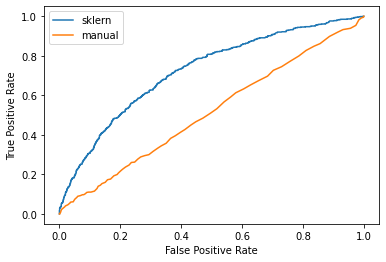

In [41]:
plt.plot(fpr, tpr, label = 'sklern')
plt.plot(fpr_manual, tpr_manual, label = 'manual')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [42]:

square_roc = 0
for i in range(len(fpr_manual) - 1):
    square_roc += 0.5 * (tpr_manual[i+1] + tpr_manual[i]) * (fpr_manual[i+1] - fpr_manual[i])
print('Площадь под кривой Manual: ', square_roc)
print('Площадь под кривой Roc_auc_score: ', roc_auc_score( Y_test, predictions[:, 1] ))

Площадь под кривой Manual:  0.5139400774540062


NameError: name 'roc_auc_score' is not defined

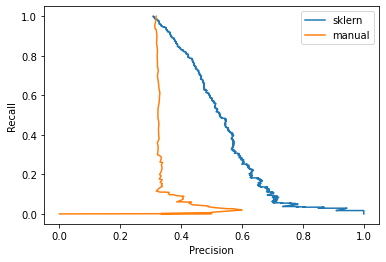

In [43]:

plt.plot(pr, re, label = 'sklern')
plt.plot(precision_manual, recall_manual, label = 'manual')

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend()
plt.show()